<a href="https://colab.research.google.com/github/Rajat504/CLOUDYML/blob/main/Time_Series_Module9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><u>Assignment:10- Convolution and CNN for Time Series</center></h1></u>

Hello everyone!! A hearty welcome to the 10th Assignment of the time series module.

![](https://i.pinimg.com/originals/68/fc/84/68fc840dc98e026ba8c76fdfc5e82855.jpg)

In this assignment you will be learning about Convolution in Time series with its simulation and CNN for time series.

<h2><u>Table of Contents:</h2></u>

1. Convolutional Neural Networks<br>
2. Effect of Convolution on numerical data<br>
3. CNN for Time Series forecasting

<h1><u>Convolutional Neural Networks</h1></u>

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning system that can take an input image, assign relevance (learnable weights and biases) to various aspects/objects in the image, and distinguish between them. The architecture of a ConvNet is inspired by the organisation of the Visual Cortex and is akin to the connectivity pattern of Neurons in the Human Brain. Individual neurons can only respond to stimuli in a small area of the visual field called the Receptive Field. A number of similar fields can be stacked on top of each other to span the full visual field.

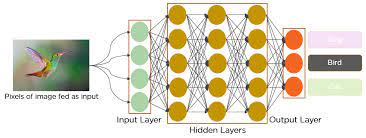

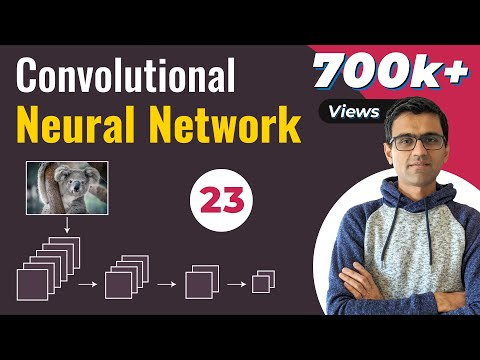

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('zfiSAzpy9NM', width=700, height=400)

<h3><u>Architecture of CNN</h3></u>

![](https://boostedml.com/wp-content/uploads/2020/04/image-4.png)

The convolutional layer receives a fixed length sub-sequence of the complete time series from the input layer. The input is smoothed by the convolutional and pooling layers, which we will discuss shortly. The RELU layer applies a RELU non-linear transformation to the smoothed sub-sequence, and the output plugs the vector-valued result into another activation function to produce class probabilities, a continuous-valued response, counts, or any other type of response depending on the activation function used.

<h3><u>Convolutional Layers</h3></u>

* **What is a Convolution?**

Convolution, in purely mathematical terms, is a function formed by integration from two given functions that expresses how the shape of one is modified by the other.

![](https://www.researchgate.net/profile/Volker-Weinberg/publication/332190148/figure/fig2/AS:743933420249088@1554378957080/Schematic-illustration-of-a-convolutional-operation-The-convolutional-kernel-shifts-over.ppm)

At its core, 2D convolution is a rather straightforward operation: you begin with a kernel, which is simply a small matrix of weights. This kernel "slides" over the 2D input data, doing elementwise multiplication with the portion of the input it is currently on, and summing the results into a single output pixel. For each point it glides over, the kernel repeats the process, transforming a 2D matrix of features into another 2D matrix of features. The output features are essentially the weighted sums of the input features positioned nearly in the same location as the output pixel on the input layer (with the weights being the kernel's own values).

* Refer: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

A convolution matrix can be used to alter an image. Here are a few examples of picture filters created with these matrices.

![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/70_blog_image_6.png)
![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/70_blog_image_7.png)

<h3><u>Pooling</h3></u>

Pooling involves chunking a vector into non-overlapping equal sized groups or ‘pools’, and then taking a summary statistic for each group. This further smooths out noise in local dynamics. Three common types of pool are max pooling (very common with images), average or mean pooling, and min pooling.

![](https://miro.medium.com/max/500/1*KQIEqhxzICU7thjaQBfPBQ.png)

<h3><u>RELU Layer</h3></u>

The relu layer takes the smoothed vector obtained from the convolutional and pooling layers and applies non-linearity to it in order to prepare it for the final output layer.

![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/71_blog_image_1.png)

<h3><u>Output Layer</h3></u>

The final output layer takes a representation of our original data that has gone through two layers of smoothing and one layer of non-linear transformation, and applies an activation function to a weighted sum of that representation to produce output data that is of the relevant form based on our activation function of choice. Class probabilities, a continuous-valued response, count data, or ordinal data are all examples of this.

<h1><b>For deep intuition of Convolutional neural networks, refer the given documentation:</h1></b>

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

<h1><u>Effect of Convolution on numerical data</h1></u>

We know the effect of Convolution on images like applying various filters,edge detection,etc.

![](https://miro.medium.com/max/1206/1*ZPXWZDIHFbTxs-6KVPS5gg.png)

In this section we will see how convolution affects numerical data and time series. Here we simulate a sequence, applying a convolution to that sequence, and then apply average pooling to get some intuition for how these layers change our original data.



Lets start by importing the required libraries.
* numpy: for array and matrix operations
* skimage.measure
* matplotlib: for visualizations



In [ ]:
#import the above mentioned libraries
import numpy as np
from skimage.measure import block_reduce
import matplotlib.pyplot as plt


Now you need to create a sequence of numbers on which convolution will be performed. Use the np.random.normal function to do so. random.normal draws random samples from a normal (Gaussian) distribution. Take mean as 0 and standard deviation as 10 and size as 100.

* Refer: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html.

After creating the sequence take the cumulative sum of the sequence using cumsum method.
* Refer: https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html.

Initialize an array that will be used as kernel([1,1,2,5,3])for convolution. Use the convolve function of numpy to convolve the cumulative sequence and the defined kernel. Keep mode as 'same' which returns the convolved array with same size as that of the maximum of two passed arrays.
* Refer: https://numpy.org/doc/stable/reference/generated/numpy.convolve.html.

Take the transpose of the convolved array using np.matrix.T.
* Refer: https://numpy.org/doc/stable/reference/generated/numpy.matrix.T.html


In [ ]:
#create random data
x=np.random.normal(0,10,100)

#apply cumsum
x=np.cumsum(x)

#define kernel'
kernel=np.array([1,1,2,5,3])

#apply convolution
y=np.convolve(x,kernel,mode='same')

#take transpose
y=np.matrix.transpose(y)


The seqeunce and convolved sequence both are ready. lets first visualize the original sequence using matplotlib.

Text(0.5, 1.0, 'Original sequence')

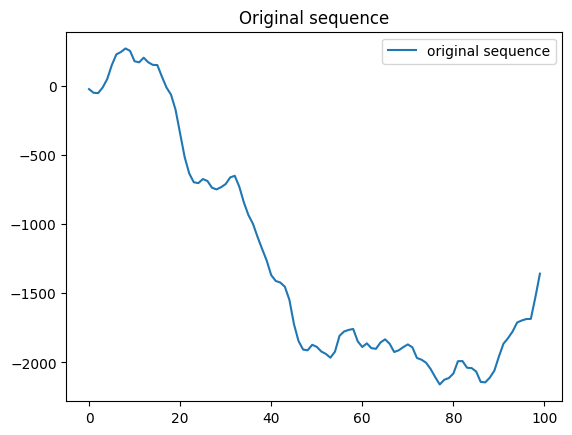

In [ ]:
#plot original cumulated sequence
plt.plot(y,label='original') # Changed plt.plotplt.plot to plt.plot
#set legend
plt.legend(['original sequence'])

#set title
plt.title('Original sequence')

Next visualize the convolved sequence.

Text(0.5, 1.0, 'Convolved sequence')

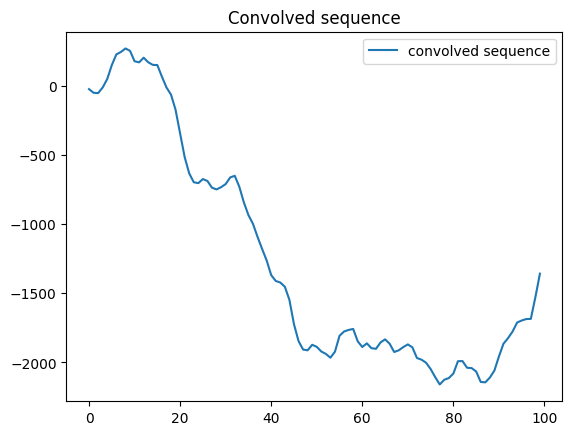

In [ ]:
#plot the convolved sequence
plt.plot(y,label='convolved')

#set legend
plt.legend(['convolved sequence'])

#set title
plt.title('Convolved sequence')


As you can see, a lot of the noise has been smoothed out, and the plot now looks much less jagged.

We then apply average pooling with pools of size 3. For this use the skimage.measure.block_reduce function which downsamples  or data by applying function to local blocks. The function used in this case will be np.mean as we are performing average pooling.
* Refer: https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.block_reduce

Shape of y: (10, 9)


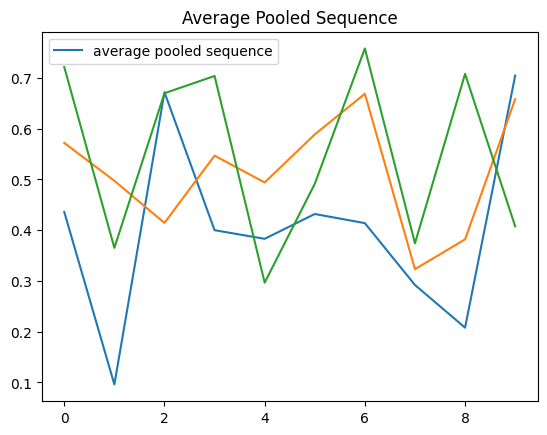

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Example data for y (replace this with your actual data)
y = np.random.rand(10, 9)  # Example: 2D array with shape (10, 9)

# Check the shape of y
print("Shape of y:", y.shape)

# Apply average pooling
# Adjust block size based on the shape of y
if len(y.shape) == 1:  # 1D array
    y_pooled = block_reduce(y, (3,), np.mean)  # Example for 1D
elif len(y.shape) == 2:  # 2D array
    y_pooled = block_reduce(y, (1, 3), np.mean)  # Example for 2D
else:
    raise ValueError("Unsupported number of dimensions in y")

# Plot the average pooled data
plt.plot(y_pooled, label='average pooled')

# Set legend
plt.legend(['average pooled sequence'])

# Set title
plt.title('Average Pooled Sequence')
plt.show()

Text(0.5, 1.0, 'Average pooled sequence')

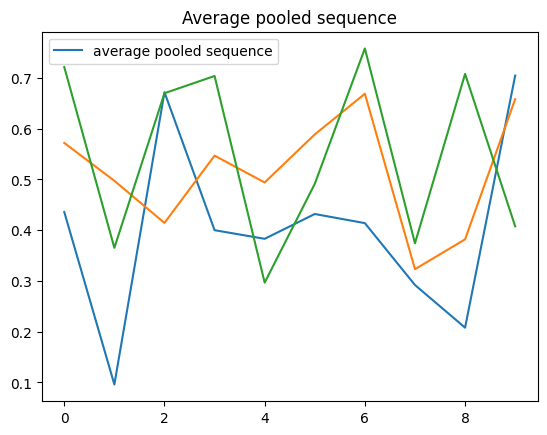

In [ ]:
#apply average pooling
y=block_reduce(y,(1,3),np.mean)

#plot the average pooled data
plt.plot(y,label='average pooled')

#set legend
plt.legend(['average pooled sequence'])

#set title
plt.title('Average pooled sequence')


This time it's a lot smoother. <br>
Hence convolution smoothes the data and removes extra noise in case of time series data as well.

<h1><u>CNN for Time Series forecasting</h1></u>


After seeing the effect of convolution on time series data, we now look at how CNN is useful in time series forecasting.

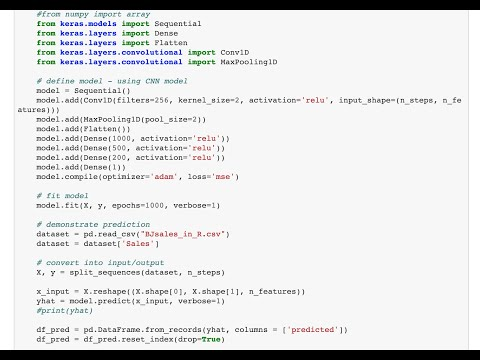

In [ ]:
## Refer video
YouTubeVideo('1AzwQDmUfCA', width=700, height=400)

The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [ ]:
# import drive from google.colab
import google.colab.drive as drive

# mount the drive
drive.mount('/content/drive')


Mounted at /content/drive


Next import the necessary libraries.
* warnings: to work on arising warnings during execution.
* numpy: for array and matrix operations
* matplotlib.pyplot: for plotting and visualizations
* pandas: for storing and manipulating data
* statsmodels.api: classes and functions for statistical models
* plot_acf: for plotting autocorrelation plot

In [ ]:
#import above mentioned libararies
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

#filter warnings to ignore them
warnings.filterwarnings('ignore')


Now you need to set some of the matplotlib parameters so that you dont need to specify them everytime. use the rcParams function to do so. You need to pass the parameter name and its corresponding value.
* Refer: https://matplotlib.org/stable/api/matplotlib_configuration_api.html

In [ ]:
#set labelzise on axes
plt.rcParams['axes.labelsize'] = 15

#set xtick.labelsize
plt.rcParams['xtick.labelsize'] = 15

#set ytick.labelsize
plt.rcParams['ytick.labelsize'] = 15

#set text.color
plt.rcParams['text.color'] = 'k'

#set figure.figsize
plt.rcParams['figure.figsize'] = (10, 5)


Ahead read the dataset using read_csv method. Download the dataset from the given link and upload it in your drive. https://drive.google.com/file/d/1atMdurgvBBZGtK1XmD0X7zqByHxQi-M8/view?usp=sharing. <br>Parse the dates and keep index column as 0th column when reading the csv. The dataset contains two columns,time and sales. Plot the dataset using matplotlib.pyplot

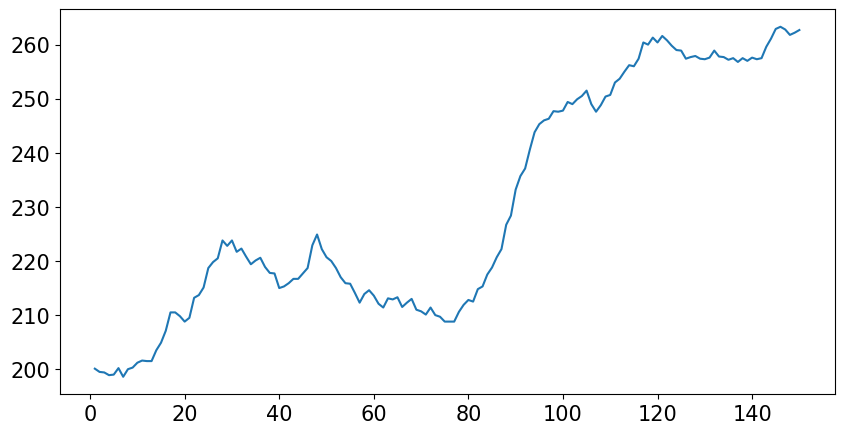

In [ ]:
#get dataset path
path='/content/BJ_Sales.csv'

#read the dataset
dataset=pd.read_csv(path,parse_dates=['time'],index_col=0)

#plot the data
plt.plot(dataset)

#set x label as Date
x_label='Date'

#set y label as Sales
y_label='Sales'

#set title as Time series data



After reading the dataset,check its shape and first 5 or 10 rows using head function.

In [ ]:
#print dataset shape
print(dataset.shape)

#print first 5 or 10 rows
print(dataset.head(10))


(150, 1)
      BJsales
time         
1       200.1
2       199.5
3       199.4
4       198.9
5       199.0
6       200.2
7       198.6
8       200.0
9       200.3
10      201.2


Next check the autocorrelation plot using plot_acf

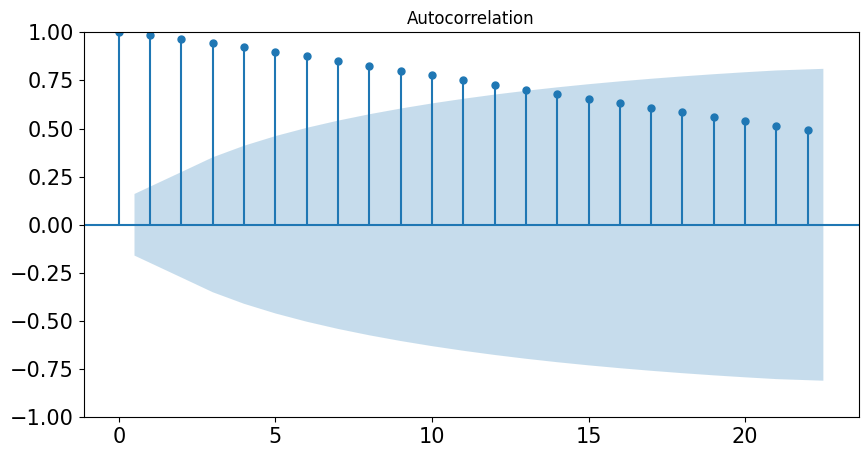

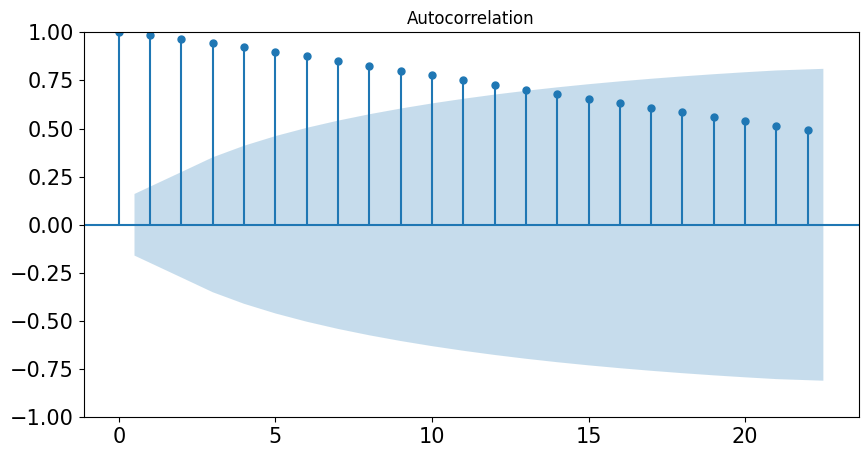

In [ ]:
#plot_acf
plot_acf(dataset)



The values are quite correlated.<br>
Next in, create a function which will split the sequences in given number of steps. For example, consider a sequence [1,2,3,4,5,6] and number of steps as 3. Our function will return numerous sequences like X=([1,2,3],[2,3,4],[3,4,5],[4,5,6]) and y=[3,4,5,6].Hence the original sequence is divided based on number of steps and the last number in each step is the output(base for next prediction).

**This function is implemented as in time series each value or observation is highly dependent on previous observation.**

In [ ]:
#import array from numpy
import numpy as np

#define the function taking the sequence and number of steps as parameters
def sequences(seq,n_steps):

  #initialize X and y lists
  X,y=[],[]
#import array from numpy
import numpy as np

#define the function taking the sequence and number of steps as parameters
def sequences(seq,n_steps):

  #initialize X and y lists
  X,y=[],[]

  #iterate through length of the sequence
  for i in range(len(seq)):


    # find the end of this pattern by adding number of steps to iteration variable
    end_ix = i + n_steps

    # check if end of pattern is less than end of entire sequence
    if end_ix > len(seq)-1:
      break

      #break

    # gather input and output parts of the pattern
    #seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
    seq_x, seq_y = seq[i:end_ix], seq[end_ix]

    #append seq_x in X
    X.append(seq_x)

    #append seq_y in y
    y.append(seq_y)

  #convert X and y to numpy arrays
  X=np.array(X)
  y=np.array(y)

  #return the array form of X and y
  return X,y




Next apply the above created function by passing the dataset and number of steps as 3. Print the X and y data to understand that how the data has been splitted.

In [ ]:
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = sequences(dataset['BJsales'].values, n_steps)  # Access the 'sales' column and convert to NumPy array
#print X
print(X)
#print y
print(y)

#print shape of X
print(X.shape)

#print shape of y
print(y.shape)

# summarize the data
for i in range(len(X)):
  print(X[i], y[i])


[[200.1 199.5 199.4]
 [199.5 199.4 198.9]
 [199.4 198.9 199. ]
 [198.9 199.  200.2]
 [199.  200.2 198.6]
 [200.2 198.6 200. ]
 [198.6 200.  200.3]
 [200.  200.3 201.2]
 [200.3 201.2 201.6]
 [201.2 201.6 201.5]
 [201.6 201.5 201.5]
 [201.5 201.5 203.5]
 [201.5 203.5 204.9]
 [203.5 204.9 207.1]
 [204.9 207.1 210.5]
 [207.1 210.5 210.5]
 [210.5 210.5 209.8]
 [210.5 209.8 208.8]
 [209.8 208.8 209.5]
 [208.8 209.5 213.2]
 [209.5 213.2 213.7]
 [213.2 213.7 215.1]
 [213.7 215.1 218.7]
 [215.1 218.7 219.8]
 [218.7 219.8 220.5]
 [219.8 220.5 223.8]
 [220.5 223.8 222.8]
 [223.8 222.8 223.8]
 [222.8 223.8 221.7]
 [223.8 221.7 222.3]
 [221.7 222.3 220.8]
 [222.3 220.8 219.4]
 [220.8 219.4 220.1]
 [219.4 220.1 220.6]
 [220.1 220.6 218.9]
 [220.6 218.9 217.8]
 [218.9 217.8 217.7]
 [217.8 217.7 215. ]
 [217.7 215.  215.3]
 [215.  215.3 215.9]
 [215.3 215.9 216.7]
 [215.9 216.7 216.7]
 [216.7 216.7 217.7]
 [216.7 217.7 218.7]
 [217.7 218.7 222.9]
 [218.7 222.9 224.9]
 [222.9 224.9 222.2]
 [224.9 222.2

Reshape the X data based on number of features which is 1. reshape from [samples, timesteps] into [samples, timesteps, number of features]

In [ ]:
#set number of features to 1
n_features = 1

# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))

#print(X)
print(X.shape)


(147, 3, 1)


The data has now been processed. Its time for creating the model. Before beginning import some necessary dependencies.
* Sequential: groups a linear stack of layers into a tf.keras.Model.
* Dense, Flatten, Conv2D, MaxPool2D

Refer:
* https://keras.io/api/layers/core_layers/dense/
* https://keras.io/api/layers/reshaping_layers/flatten/
* https://keras.io/api/layers/convolution_layers/convolution2d/
* https://keras.io/api/layers/pooling_layers/max_pooling2d

In [ ]:
#import above mentioned dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool1D



#create sequential model
model = Sequential()

#add a convolution layer with 256 kernels with kernel size of 2,relu activation and input_shape=(n_steps, n_features)
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(n_steps, n_features))) # Changed Conv2D to Conv1D to match the input shape

#add max pooling layer with pool size of 2
model.add(MaxPool1D(pool_size=2)) # Changed MaxPool2D to MaxPool1D

#add flatten layer
model.add(Flatten())

#add dense layer with relu activation and 1000 neurons
model.add(Dense(1000, activation='relu'))

#add dense layer with relu activation and 500 neurons
model.add(Dense(500, activation='relu'))

#add dense layer with relu activation and 200 neurons
model.add(Dense(200, activation='relu'))

#add dense layer with 1 output unit
model.add(Dense(1))

#compile model using adam optimizer and mse loss function
model.compile(optimizer='adam', loss='mse')

#print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 256)         │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       257,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 858,669 (3.28 MB)

 Trainable params: 858,669 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

After creating the model, fit the model using fit() function and 500 epochs

In [ ]:
# fit model
model.fit(X, y, epochs=500)



Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 29482.0156
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5487.1694
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3038.7554
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 522.1995
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 417.9572
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 595.6283
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 199.7982
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 50.3891
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 69.3507
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 64.0584
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 38.3737
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.3730
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.8516
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7873
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.8

Lets now predict the data using the predict function.

In [ ]:
#predict X
yhat = model.predict(X)

#print(yhat)
print(yhat.shape)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(147, 1)


Store these predictions in another dataframe using the pd.DataFrame function.
* Refer: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_records.html

In [39]:
#df_pred = pd.DataFrame.from_records(yhat, columns = ['predicted'])
df_pred = pd.DataFrame(yhat, columns=['predicted'])


#df_pred = df_pred.reset_index(drop=True)
df_pred = df_pred.reset_index(drop=True)

#df_actual = dataset[n_steps:len(dataset)]
df_actual = dataset[n_steps:]

#df_actual = df_actual.reset_index(drop=True)
df_actual = df_actual.reset_index(drop=True)


Our next task is to evaluate the performance of the model. Import the below mentioned metrics from sklearn.metrics.
* r2_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
* mean_absolute_error: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
* mean_squared error: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
* mean_squared_log_error: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

Apply these metrics to the actual data and predicted data and print it.

In [40]:
# import above mentioned metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

#get r2 score
r2 = r2_score(df_actual, df_pred)

#print r2 score
print("R2 Score:", r2)


#get mean absolute error
mae = mean_absolute_error(df_actual, df_pred)

#print the mean absolute error
print("Mean Absolute Error:", mae)


#get mean squared error
mse = mean_squared_error(df_actual, df_pred)

#print the mean squared error
print("Mean Squared Error:", mse)


#get mean squared log error
msle = mean_squared_log_error(df_actual, df_pred)

#print the mean squared log error
print("Mean Squared Log Error:", msle)


#print root mean squared error by applying np.sqrt to mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))



R2 Score: 0.9896841048229719
Mean Absolute Error: 1.78012410896976
Mean Squared Error: 4.6268746590298155
Mean Squared Log Error: 8.924533711119793e-05
Root Mean Squared Error: 2.1510171219750474


The performance of our model looks good!!<br>
Better understand this performance by plotting the observed and predicted data.

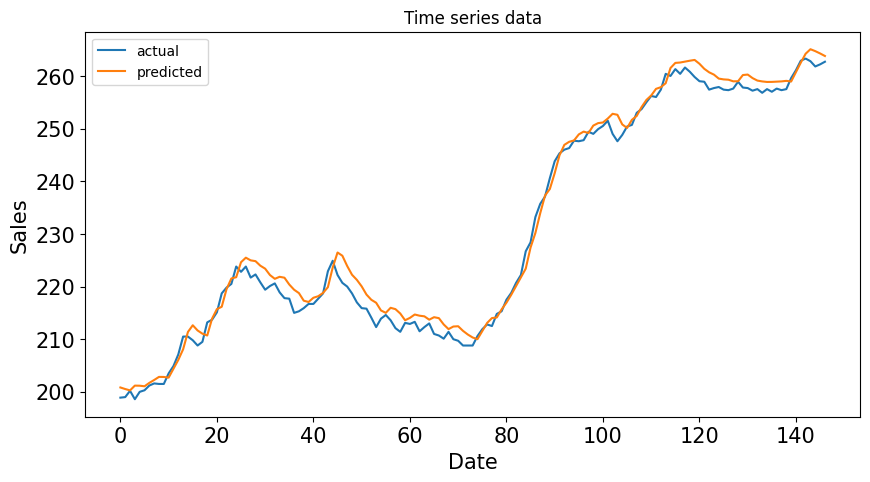

In [41]:
# plot actual data
plt.plot(df_actual, label='actual')

#plot predicted data
plt.plot(df_pred, label='predicted')


#set x label as Date
plt.xlabel('Date')

#set y label as Sales
plt.ylabel('Sales')

#set title as Time series data
plt.title('Time series data')

#set legend and show
plt.legend()
plt.show()



### The plot seems very nice!!

Next lets forecast the data. For this we need to apply some processing to craeted the forecasted data as no function is present in CNN for forecasting.

In [42]:
# predict the X data and store it in another variable
yhat = model.predict(X)

#print shape of yhat
print(yhat.shape)

#future_time_steps = 7
future_time_steps = 7

# take the last input,X[-1:,:,:]
x1 = X[-1:,:,:]

#print shape of x1
print(x1.shape)

# take the last prediction,predictions[-1:]
p1 = yhat[-1:]

#print shape of p1
print(p1.shape)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
(147, 1)
(1, 3, 1)
(1, 1)


Now start by iterating through range of future time steps and create a new array by passing 1st index value of 0th data value,2nd index value of 0th data value and p1(last prediction). Then predict this newly formed array and append in predictions. Follow this process in each iteration.

In [45]:
#iterate through future_time_steps range
for i in range(future_time_steps):
  #create an array,np.array([[x1[0][1], x1[0][2], p1]]).astype('float32')
  # Extract the scalar value from p1
  # The issue was p1 was a (1, 1) array
  # and needed to be converted to a scalar
  p1_scalar = p1[0, 0]

  # Create x2 with consistent dimensions
  # This line previously caused the error
  # as it was trying to combine a scalar with arrays
  x2 = np.array([[x1[0][1][0], x1[0][2][0], p1_scalar]]).astype('float32')

  # Reshape x2 to match the input shape expected by the model
  x2 = x2.reshape((1, n_steps, n_features))

  #predict x2
  p2 = model.predict(x2)

  #append this prediction in old predictions
  # initialize predictions array outside the loop
  if i == 0:
      predictions = p2
  else:
      predictions = np.append(predictions, p2)
  #store x2 in x1, x1=x2
  x1, p1 = x2, p2

  #store p2 in p1, p1=p2
  p1 = p2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


After getting the forecasted data,lets plot the data.

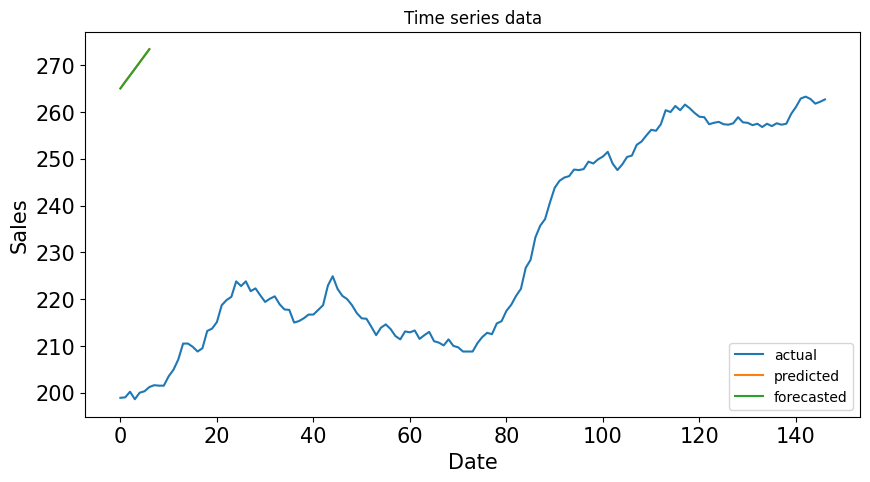

In [46]:
# plot actual data
plt.plot(df_actual, label='actual')

#plot predicted data
plt.plot(predictions, label='predicted')

#plot forecasted data
plt.plot(predictions, label='forecasted')

#set x label as Date
plt.xlabel('Date')

#set y label as Sales
plt.ylabel('Sales')

#set title as Time series data
plt.title('Time series data')

#set legend and show
plt.legend()
plt.show()



Congratulations!!! You've done it.

In this assignment you learned:
* CNN
* Effect of convolution on time series data
* Using CNN to forecast time series


Keep practising!!<br><br>

## Do fill the feedback form given below:
[Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)
<br><br> See you then!!

![](https://media.makeameme.org/created/ok-bye-now.jpg)
